In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.max_columns = None

import warnings
warnings.filterwarnings('ignore')

In [4]:
# from google.colab import drive
# drive.mount('/gdrive')

Mounted at /gdrive


## Airline Passenger Satisfaction
**What factors lead to customer satisfaction for an Airline?**  
https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

### Context
This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can you predict passenger satisfaction?

### Content
*Gender*: Gender of the passengers (Female, Male)  
*Customer Type*: The customer type (Loyal customer, disloyal customer)  
*Age*: The actual age of the passengers  
*Type of Travel*: Purpose of the flight of the passengers (Personal Travel, Business Travel)  
*Class*: Travel class in the plane of the passengers (Business, Eco, Eco Plus)  
*Flight distance*: The flight distance of this journey  
*Inflight wifi service*: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)  
*Departure/Arrival time convenient*: Satisfaction level of Departure/Arrival time convenient  
*Ease of Online booking*: Satisfaction level of online booking  
*Gate location*: Satisfaction level of Gate location  
*Food and drink*: Satisfaction level of Food and drink  
*Online boarding*: Satisfaction level of online boarding  
*Seat comfort*: Satisfaction level of Seat comfort  
*Inflight entertainment*: Satisfaction level of inflight entertainment  
*On-board service*: Satisfaction level of On-board service  
*Leg room service*: Satisfaction level of Leg room service  
*Baggage handling*: Satisfaction level of baggage handling  
*Check-in service*: Satisfaction level of Check-in service  
*Inflight service*: Satisfaction level of inflight service  
*Cleanliness*: Satisfaction level of Cleanliness  
*Departure Delay in Minutes*: Minutes delayed when departure  
*Arrival Delay in Minutes*: Minutes delayed when Arrival  
*Satisfaction*: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [20]:
# train_df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/ML/Course project/datasets/train.csv", 
#                        index_col=0)
train_df = pd.read_csv("./datasets/train.csv", index_col=0)
train_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
train_df.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0
Seat comfort,103904.0,3.439396,1.319088,0.0,2.00,4.0,5.00,5.0


In [25]:
train_df.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [21]:
# Пропущенные значения
train_df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

Заполняю пропущенные значения признака "Arrival Delay in Minutes" модой

In [12]:
train_df['Arrival Delay in Minutes'].mode()

0    0.0
dtype: float64

In [22]:
train_df.loc[train_df['Arrival Delay in Minutes'].isnull(), 'Arrival Delay in Minutes'] = \
    train_df['Arrival Delay in Minutes'].mode()[0]

In [24]:
train_df['Arrival Delay in Minutes'].isna().value_counts()

False    103904
Name: Arrival Delay in Minutes, dtype: int64

Заменяю значения целевой переменно на 0 и 1

In [26]:
train_df.satisfaction = np.where(train_df.satisfaction == 'satisfied', 1, 0)
train_df.satisfaction.value_counts()

0    58879
1    45025
Name: satisfaction, dtype: int64

In [33]:
train_df.head(1)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0


In [42]:
for col in train_df.columns[1:]:
    print(f'{col}\n{train_df[col].value_counts()}')
    print('*' * 30)

Gender
Female    52727
Male      51177
Name: Gender, dtype: int64
******************************
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64
******************************
Age
39    2969
25    2798
40    2574
44    2482
42    2457
      ... 
74      47
76      45
79      42
78      33
85      17
Name: Age, Length: 75, dtype: int64
******************************
Type of Travel
Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64
******************************
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64
******************************
Flight Distance
337     660
594     395
404     392
2475    369
862     369
       ... 
1232      1
1116      1
988       1
1270      1
709       1
Name: Flight Distance, Length: 3802, dtype: int64
******************************
Inflight wifi service
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Infligh

In [44]:
cont_features = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
cat_features = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 
                'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink',
                'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 
                'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
target = ['satisfaction']

In [62]:
X_train = train_df[cont_features + cat_features]
y_train = train_df[target]

In [63]:
X_train.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,13,460,25,18.0,Male,Loyal Customer,Personal Travel,Eco Plus,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,25,235,1,6.0,Male,disloyal Customer,Business travel,Business,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,26,1142,0,0.0,Female,Loyal Customer,Business travel,Business,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,25,562,11,9.0,Female,Loyal Customer,Business travel,Business,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,61,214,0,0.0,Male,Loyal Customer,Business travel,Business,3,3,3,3,4,5,5,3,3,4,4,3,3,3


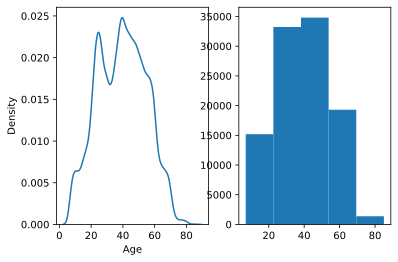

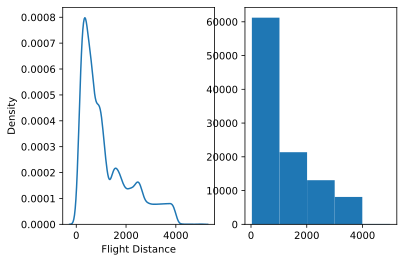

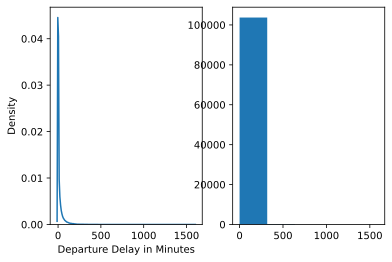

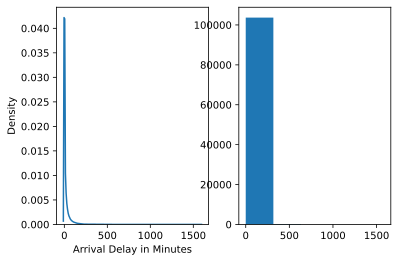

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'

for column in cont_features:
    plt.subplot(1,2,1)
    sns.kdeplot(X_train[column])
    plt.subplot(1,2,2)
    plt.hist(X_train[column], bins=5)
    plt.show()

In [48]:
from sklearn.preprocessing import PowerTransformer
pT = PowerTransformer( method='box-cox')

In [50]:
x_new = pT.fit_transform(X_train.loc[:,['Departure Delay in Minutes', 'Arrival Delay in Minutes']]+1)

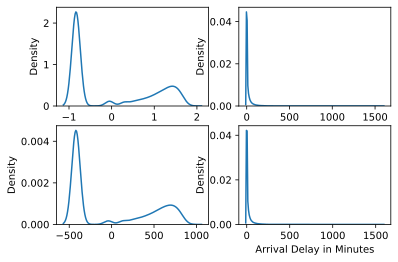

In [52]:
plt.subplot(2,2,1)
sns.kdeplot(x_new[:,0])
plt.subplot(2,2,2)
sns.kdeplot(X_train['Departure Delay in Minutes'].values)
plt.xlabel('Departure Delay in Minutes')
plt.subplot(2,2,3)
sns.kdeplot(x_new[:,1]*500)
plt.subplot(2,2,4)
sns.kdeplot((X_train['Arrival Delay in Minutes'].values))
plt.xlabel('Arrival Delay in Minutes')
plt.show()

In [53]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')

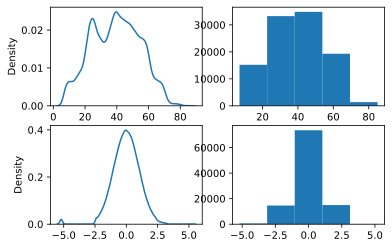

In [61]:
dq =qt.fit_transform(X_train['Age'].values.reshape(-1,1))
plt.subplot(2,2,1)
sns.kdeplot(X_train['Age'].values)
plt.subplot(2,2,2)
plt.hist(X_train['Age'], bins=5)
plt.subplot(2,2,3)
sns.kdeplot(dq[:,0])
plt.subplot(2,2,4)
plt.hist(dq, bins=5)
plt.show()

<AxesSubplot:>

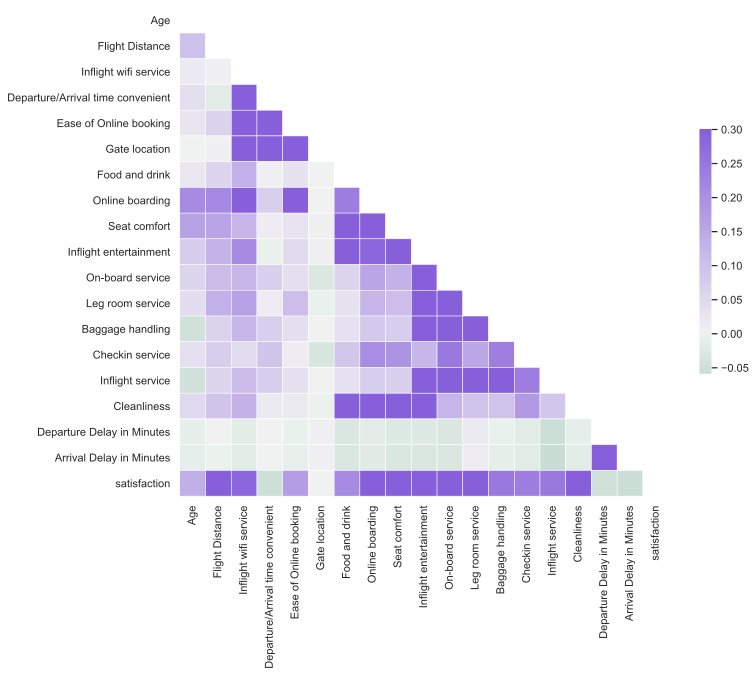

In [68]:
# Compute the correlation matrix
df_corr = train_df.iloc[:, 1:].corr()

sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(150, 275, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [74]:
df_corr[target].sort_values(by=['satisfaction'])

,satisfaction
Arrival Delay in Minutes,-0.057435
Departure/Arrival time convenient,-0.051601
Departure Delay in Minutes,-0.050494
Gate location,0.000682
Age,0.137167
Ease of Online booking,0.171705
Food and drink,0.209936
Checkin service,0.236174
Inflight service,0.244741
Baggage handling,0.247749


In [78]:
from sklearn.preprocessing import PolynomialFeatures
pL = PolynomialFeatures(degree=2)

In [80]:
x_new_poly = pL.fit_transform(X_train.loc[:,cont_features])
x_new_poly

array([[1.000e+00, 1.300e+01, 4.600e+02, ..., 6.250e+02, 4.500e+02,
        3.240e+02],
       [1.000e+00, 2.500e+01, 2.350e+02, ..., 1.000e+00, 6.000e+00,
        3.600e+01],
       [1.000e+00, 2.600e+01, 1.142e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 3.000e+01, 1.995e+03, ..., 4.900e+01, 9.800e+01,
        1.960e+02],
       [1.000e+00, 2.200e+01, 1.000e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 2.700e+01, 1.723e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [92]:
np.set_printoptions(suppress=True)

x_new_poly[0]

array([     1.,     13.,    460.,     25.,     18.,    169.,   5980.,
          325.,    234., 211600.,  11500.,   8280.,    625.,    450.,
          324.])